In [21]:
#importing modules for training the network
import tensorflow as tf #tensorflow import
from keras.models import Model #to construct the model 
from keras.preprocessing import image #for procesing the images
from keras.models import Sequential #for sequential model construction
from keras.layers import Input , Conv2D, Dense ,Flatten , Dropout , Activation, MaxPooling2D #various layers for CNN

In [22]:
import scipy.io as sio #reading and writing images
import numpy as np #for linear algebra operations
import matplotlib.pyplot as plt #plotting graphs
import keras.optimizers as optimizers #optimizer to be used during training

In [23]:
model = Sequential()  
    
# Convolution -> ReLU -> MaxPool2D -> Dropout
model.add(Conv2D(128, (3, 3),padding='valid', input_shape=(224, 224,3 ))) #128 (3x3)filters and input shape of 224 by 224
model.add(Activation('relu')) #adding activation of ReLU
model.add(MaxPooling2D(pool_size=(2, 2))) # 2 by 2 maxpooling to reduce the feaures
model.add(Dropout(0.3)) #add dropout to reduce overfitting model

# Convolution
model.add(Conv2D(64, (3, 3))) #64 (3x3) filters other parameters save as above convolution block
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Flatten
model.add(Flatten()) #flatten the input into single dimentional vector representation

# Fully connection
model.add(Dense(512))  # unit between[#input, #output]
model.add(Activation('relu'))
    
# initialize output layer
model.add(Dense(15)) #output layer with 15 neurons as we have 15 classes
model.add(Activation('softmax')) #as multiclass classification problem so SoftMax activation function
model.summary() #to print the model architecture

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 222, 222, 128)     3584      
_________________________________________________________________
activation_17 (Activation)   (None, 222, 222, 128)     0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 111, 111, 128)     0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 111, 111, 128)     0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 109, 109, 64)      73792     
_________________________________________________________________
activation_18 (Activation)   (None, 109, 109, 64)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 54, 54, 64)       

In [24]:
# compile
lr=0.001 #learning rate
decay=1e-6 #decay
momentum=0.9 # momentum
sgd = optimizers.SGD(lr=lr, decay=decay, momentum=momentum, nesterov=True) #using SGC optimizer
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy']) #compiling model with categorical cross entropy and SGD with momentum

In [25]:
# Part 2 - Fitting the CNN to the images
from tensorflow.keras.preprocessing.image import ImageDataGenerator #generate image batches

#use the image data generator to import the images from the dataset
#data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1. / 255)

In [26]:
#setting training and testing directories
train_path = 'C://Users//user//Desktop//Infento//Project 3. Face Recognition//dataset_cnn//train//' 
test_path = 'C://Users//user//Desktop//Infento//Project 3. Face Recognition//dataset_cnn//test//'
#using flow_from_directory for creating the images from local directories
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size=(224, 224),
                                                 batch_size=2,
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(224, 224),
                                            batch_size=2,
                                            class_mode='categorical',
                                            shuffle=False)

Found 120 images belonging to 15 classes.
Found 45 images belonging to 15 classes.


In [27]:
#fit the model
nb_train_samples=120 #num of training samples
nb_validation_samples=45 #num of testing samples
batch_size=2 #how many image to process at once
steps_per_epoch = len(training_set)//batch_size #num of epochs to train the model


#fir model and record the history in a variable
history = model.fit(training_set,
                              validation_data=test_set,
                              epochs=100,
                              steps_per_epoch=nb_train_samples // batch_size,
                              validation_steps=nb_validation_samples // batch_size)

Epoch 1/100
60/60 [==============================] - 81s 1s/step - loss: 2.9762 - accuracy: 0.1207 - val_loss: 2.7083 - val_accuracy: 0.0682
Epoch 2/100
60/60 [==============================] - 68s 1s/step - loss: 2.7103 - accuracy: 0.0993 - val_loss: 2.7085 - val_accuracy: 0.0227
Epoch 3/100
60/60 [==============================] - 70s 1s/step - loss: 2.7090 - accuracy: 0.0369 - val_loss: 2.7086 - val_accuracy: 0.0682
Epoch 4/100
60/60 [==============================] - 73s 1s/step - loss: 2.7139 - accuracy: 0.0027 - val_loss: 2.7082 - val_accuracy: 0.0455
Epoch 5/100
60/60 [==============================] - 75s 1s/step - loss: 2.7104 - accuracy: 0.0317 - val_loss: 2.7081 - val_accuracy: 0.0682
Epoch 6/100
60/60 [==============================] - 67s 1s/step - loss: 2.7092 - accuracy: 0.0578 - val_loss: 2.7082 - val_accuracy: 0.0455
Epoch 7/100
60/60 [==============================] - 78s 1s/step - loss: 2.7128 - accuracy: 0.0469 - val_loss: 2.7080 - val_accuracy: 0.0682
Epoch 8/100
6

Epoch 59/100
60/60 [==============================] - 71s 1s/step - loss: 1.6119 - accuracy: 0.3900 - val_loss: 1.6429 - val_accuracy: 0.4545
Epoch 60/100
60/60 [==============================] - 67s 1s/step - loss: 1.6030 - accuracy: 0.5106 - val_loss: 1.7790 - val_accuracy: 0.3864
Epoch 61/100
60/60 [==============================] - 68s 1s/step - loss: 1.6240 - accuracy: 0.4815 - val_loss: 1.5138 - val_accuracy: 0.5000
Epoch 62/100
60/60 [==============================] - 65s 1s/step - loss: 1.4570 - accuracy: 0.5075 - val_loss: 1.5592 - val_accuracy: 0.4545
Epoch 63/100
60/60 [==============================] - 62s 1s/step - loss: 1.6799 - accuracy: 0.4198 - val_loss: 1.3959 - val_accuracy: 0.5682
Epoch 64/100
60/60 [==============================] - 63s 1s/step - loss: 1.3858 - accuracy: 0.4701 - val_loss: 1.5298 - val_accuracy: 0.4318
Epoch 65/100
60/60 [==============================] - 63s 1s/step - loss: 1.6345 - accuracy: 0.4247 - val_loss: 1.4393 - val_accuracy: 0.5000
Epoch 

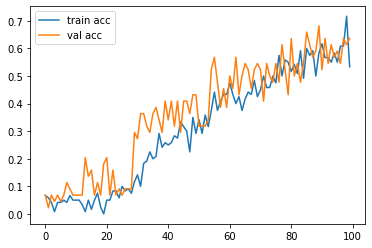

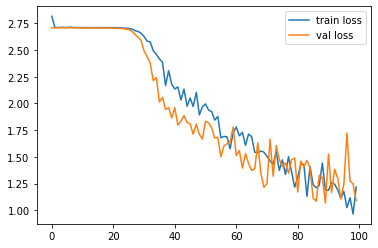

In [28]:
#PLOTTING accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'] , label = 'train acc')
plt.plot(history.history['val_accuracy'] , label = 'val acc')
plt.legend()
plt.show()

#PLOTTING loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'] , label = 'train loss')
plt.plot(history.history['val_loss'] , label = 'val loss')
plt.legend()
plt.show()